-------------------------------------------------------------------------------------------------------------------------------
# Shinkansen Travel Experience
**- The goal is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.**

**- Time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled ‘Surveydata_train.csv’.**

-------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Importing Libraries

import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV;
from sklearn.metrics import recall_score, roc_curve, classification_report, confusion_matrix,precision_score,accuracy_score;

# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [2]:
# Reading training data

data = pd.read_csv('Downloads/Traveldata_train.csv')
Survey = pd.read_csv('Downloads/Surveydata_train.csv')

In [3]:
data.head(5)
print('\n')
Survey.head(5)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [4]:
data.shape, Survey.shape

((94379, 9), (94379, 17))

In [5]:
# Merging the 2 datasets as both have features valuable to train our model

train = pd.merge(data, Survey, on = 'ID')
train.head(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [6]:
# Reading test data

data_test = pd.read_csv('Downloads/Traveldata_test.csv')
Survey_test = pd.read_csv('Downloads/Surveydata_test.csv')

In [7]:
data_test.head(5)
print('\n')
Survey_test.head(5)

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

**Observations:**

- There are 94379 rows and 25 columns in the training data.
- The columns Customer_Type, Type_Travel, Arrival_Time_Convenient, and Onboard_Service have missing values.
- We will drop the ID column as it does not add any value to the model.

In [9]:
train1 = train.copy()

In [10]:
# Dropping ID column

train1.drop('ID', axis = 1, inplace = True)

**Missing Value treatment**

In [11]:
# Rate of missing values by columns.

train1.isna().sum() / train1.shape[0] * 100

ID                         0.000000
Gender                     0.081586
Customer_Type              9.484101
Age                        0.034965
Type_Travel                9.775480
Travel_Class               0.000000
Travel_Distance            0.000000
Departure_Delay_in_Mins    0.060395
Arrival_Delay_in_Mins      0.378262
Overall_Experience         0.000000
Seat_Comfort               0.064633
Seat_Class                 0.000000
Arrival_Time_Convenient    9.461851
Catering                   9.261594
Platform_Location          0.031787
Onboard_Wifi_Service       0.031787
Onboard_Entertainment      0.019072
Online_Support             0.096420
Ease_of_Online_Booking     0.077348
Onboard_Service            8.053698
Legroom                    0.095360
Baggage_Handling           0.150457
CheckIn_Service            0.081586
Cleanliness                0.006357
Online_Boarding            0.006357
dtype: float64

In [12]:
# Dropping rows with null values from columns below.

train1 = train1[train1['Gender'].notnull()]
train1 = train1[train1['Customer_Type'].notnull()]
train1 = train1[train1['Type_Travel'].notnull()]

In [13]:
# Evaluating mean of the column

train1['Departure_Delay_in_Mins'].mean()

14.708883521906913

In [14]:
# Replacing null values with mean of column.

train1['Departure_Delay_in_Mins'] = train1['Departure_Delay_in_Mins'].fillna(train1['Departure_Delay_in_Mins'].mean())
train1['Arrival_Delay_in_Mins'] = train1['Arrival_Delay_in_Mins'].fillna(train1['Arrival_Delay_in_Mins'].mean())

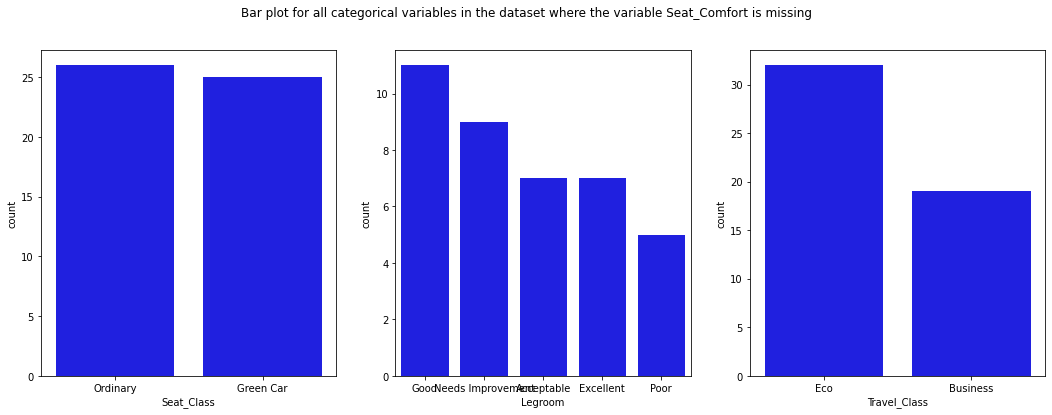

In [15]:
# Seat_Comfort Missing Value Treatment

# Creating a DataFrame for rows where Seat_Comfort has missing value
Seat_Comfort_missing_data = train1[train1['Seat_Comfort'].isnull()]


# Plotting the distribution of Seat_Class and Travel_class where Seat_Comfort missing value
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
  
fig.suptitle('Bar plot for all categorical variables in the dataset where the variable Seat_Comfort is missing')
  
sns.countplot(ax = axes[0], x = 'Seat_Class', data = Seat_Comfort_missing_data, color = 'blue', 
              order = Seat_Comfort_missing_data['Seat_Class'].value_counts().index);

sns.countplot(ax = axes[1], x = 'Legroom', data = Seat_Comfort_missing_data, color = 'blue', 
              order = Seat_Comfort_missing_data['Legroom'].value_counts().index);

sns.countplot(ax = axes[2], x = 'Travel_Class', data = Seat_Comfort_missing_data, color = 'blue', 
              order = Seat_Comfort_missing_data['Travel_Class'].value_counts().index);

**Observation:**

- By analysing the relationship between Travel_Class and Seat_Comfort, we can deduce estimated values for missing values in the Seat_Comfort column.

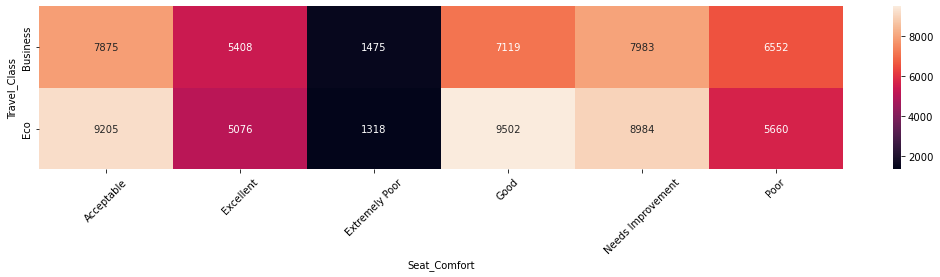

In [16]:
# Correlation heat map table to show relationship between 2 categorical variables.

fig= plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = train1['Travel_Class'], columns = train1['Seat_Comfort']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

**Observation:**

- Correlation table shows that, for 'Eco' Travel_Class column the most common category 'Seat_Comfort' column is Good and for 'Business' Travel_Class column the most common 'Seat_Confort' is Needs Improvement.
- We will replace missing values in 'Seat Comfort' column, with 'Good" and 'Needs Improvement" depending on the corresponding category for Travel_Class in the missing value row.  

In [17]:
# Fetching index of rows where Travel_Class is 'Eco' and 'Business' in the Seat_Comfort missing values dataframe

SC_missing_indices1 = train1[train1['Seat_Comfort'].isnull()].query(" Travel_Class == 'Eco' ").index
SC_missing_indices2 = train1[train1['Seat_Comfort'].isnull()].query(" Travel_Class == 'Business' ").index

In [18]:
train1['Seat_Comfort'].value_counts()

Acceptable           17080
Needs Improvement    16967
Good                 16621
Poor                 12212
Excellent            10484
Extremely Poor        2793
Name: Seat_Comfort, dtype: int64

In [19]:
# Replacing the Seat_Comfort missing values

train1.loc[SC_missing_indices1, 'Seat_Comfort'] = 'Good'

train1.loc[SC_missing_indices2, 'Seat_Comfort'] = 'Needs Improvement'

In [20]:
# Checking for categories in the variable

train1['Seat_Comfort'].value_counts()

Acceptable           17080
Needs Improvement    16986
Good                 16653
Poor                 12212
Excellent            10484
Extremely Poor        2793
Name: Seat_Comfort, dtype: int64

In [21]:
# Arrival_Time_Convenient Missing Value Treatment
# Checking for categories in the variable

train1['Arrival_Time_Convenient'].value_counts()

Good                 15785
Excellent            14276
Acceptable           12245
Needs Improvement    12147
Poor                 11032
Extremely Poor        3492
Name: Arrival_Time_Convenient, dtype: int64

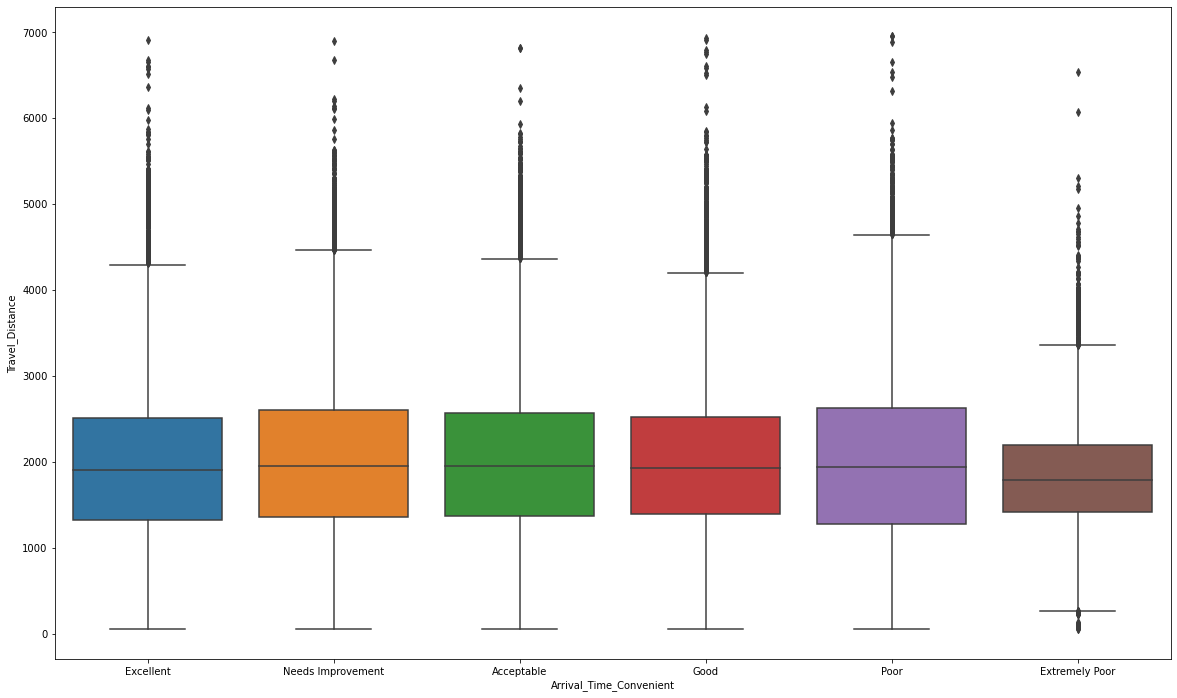

In [22]:
# Correlation heat map table to show relationship between 2 categorical variables.

plt.figure(figsize = (20, 12))

sns.boxplot(x="Arrival_Time_Convenient", y="Travel_Distance", data=train1)

plt.show()

In [23]:
# Dropping rows with null values in the Arrival_Time_Convenient column.

train1 = train1[train1['Arrival_Time_Convenient'].notnull()]

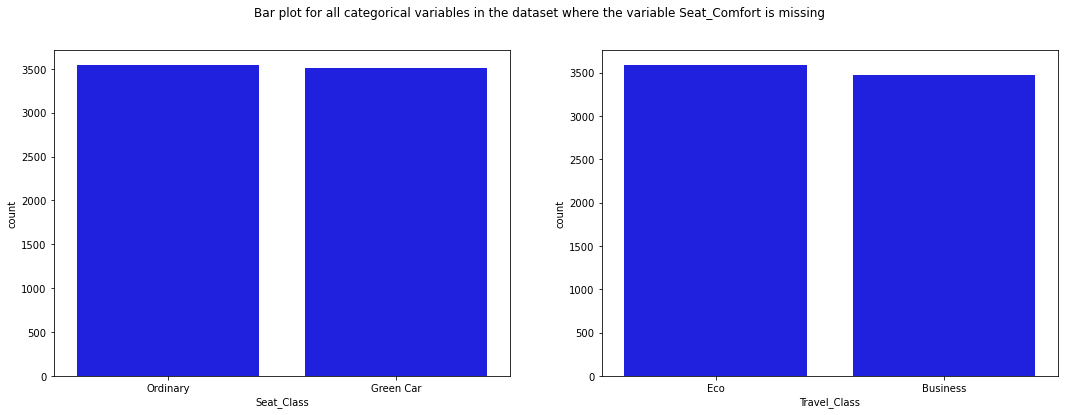

In [24]:
# Plotting the distribution of Seat_Class and Travel_class where Catering missing value

Catering_missing_data = train1[train1['Catering'].isnull()]
fig, axes = plt.subplots(1, 2, figsize = (18, 6))
  
fig.suptitle('Bar plot for all categorical variables in the dataset where the variable Seat_Comfort is missing')
  
sns.countplot(ax = axes[0], x = 'Seat_Class', data = Catering_missing_data, color = 'blue', 
              order = Catering_missing_data['Seat_Class'].value_counts().index);

sns.countplot(ax = axes[1], x = 'Travel_Class', data = Catering_missing_data, color = 'blue', 
              order = Catering_missing_data['Travel_Class'].value_counts().index);

**Observation:**

- By analysing the relationship between Travel_Class and Catering column, we can deduce estimated values for missing values in the Catering column.

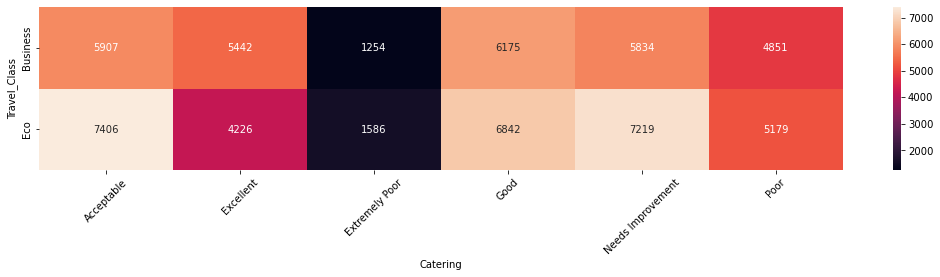

In [25]:
# Correlation heat map table to show relationship between 2 categorical variables.

fig= plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = train1['Travel_Class'], columns = train1['Catering']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

**Observation:**

- Correlation table shows that, for 'Eco' Travel_Class column the most common category in 'Catering' column is Good and for 'Business' Travel_Class column the most common category for the 'Catering' column is Needs Improvement.
- We will replace missing values in 'Catering' column, with 'Good" and 'Acceptable" depending on the corresponding category for Travel_Class in the missing value row.

In [26]:
# Fetching index of rows where Travel_Class is 'Eco' and 'Business' in the Seat_Comfort missing values dataframe

C_missing_indices1 = train1[train1['Catering'].isnull()].query(" Travel_Class == 'Eco' ").index
C_missing_indices2 = train1[train1['Catering'].isnull()].query(" Travel_Class == 'Business' ").index

# Replacing the 'Catering' missing values

train1.loc[C_missing_indices1, 'Catering'] = 'Good'
train1.loc[C_missing_indices2, 'Catering'] = 'Acceptable'

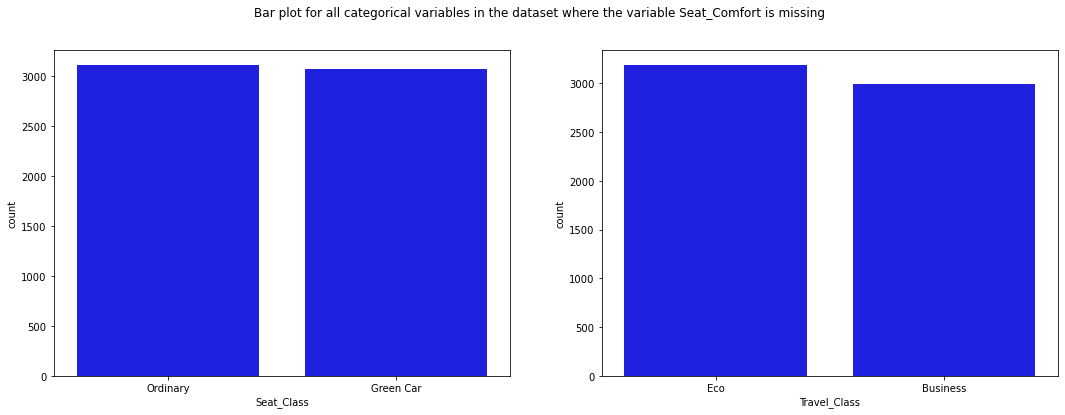

In [27]:
# Plotting the distribution of Seat_Class and Travel_class where 'Onboard_Service' has missing value

Onboard_missing_data = train1[train1['Onboard_Service'].isnull()]
fig, axes = plt.subplots(1, 2, figsize = (18, 6))
  
fig.suptitle('Bar plot for all categorical variables in the dataset where the variable Seat_Comfort is missing')
  
sns.countplot(ax = axes[0], x = 'Seat_Class', data = Onboard_missing_data, color = 'blue', 
              order = Onboard_missing_data['Seat_Class'].value_counts().index);

sns.countplot(ax = axes[1], x = 'Travel_Class', data = Onboard_missing_data, color = 'blue', 
              order = Onboard_missing_data['Travel_Class'].value_counts().index);

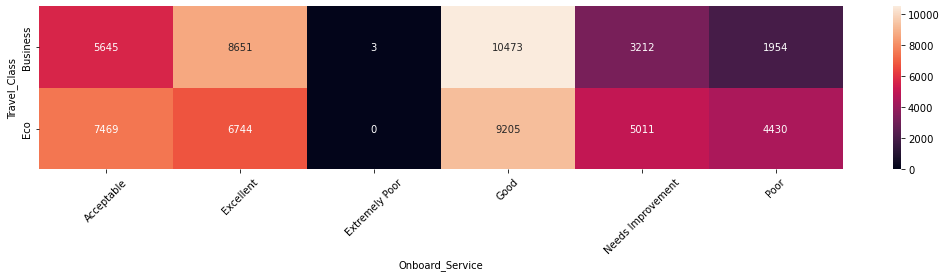

In [28]:
# Correlation heat map table to show relationship between 2 categorical variables.

fig= plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = train1['Travel_Class'], columns = train1['Onboard_Service']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

**Observation:**

- Correlation table shows that, for 'Eco' and 'Business' Travel_Class column the most common category in 'Onboard_Service' column is 'Good' for both categories.
- We will replace all missing values in 'Onboard_Service' column with 'Good'.

In [29]:
# Replacing the 'Catering' missing values

train1['Onboard_Service'] = train1['Onboard_Service'].fillna('Good')

In [30]:
# Checking the columns that have missing data and displaying only those

train1.isnull().sum()[train1.isnull().sum() != 0]

Platform_Location          8
Onboard_Wifi_Service       8
Online_Support            57
Ease_of_Online_Booking    57
Legroom                   49
Baggage_Handling          83
CheckIn_Service           56
Cleanliness                4
Online_Boarding            4
dtype: int64

In [31]:
train1.shape

(68977, 25)

In [32]:
# After treating most of the null values, we are dropping the few remaining null values from the dataset

train1 = train1.dropna()
train1.shape

(68862, 25)

In [33]:
# Checking out properties of the dataset numerical columns

train1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,68862.0,9.884716e+07,27262.988982,98800002.0,98823567.25,98847017.5,98870854.75,98894376.0
Age,68862.0,3.944890e+01,15.095453,7.0,27.00,40.0,51.00,85.0
Travel_Distance,68862.0,1.978586e+03,1029.589195,50.0,1356.00,1920.0,2537.00,6950.0
Departure_Delay_in_Mins,68862.0,1.473207e+01,37.543194,0.0,0.00,0.0,12.00,1017.0
Arrival_Delay_in_Mins,68862.0,1.509868e+01,37.859121,0.0,0.00,0.0,13.00,1011.0
Overall_Experience,68862.0,5.467747e-01,0.497811,0.0,0.00,1.0,1.00,1.0


**Observation:**

- The minimum age for passengers that took the survey is 7 years and maximum of 85 years and a mean age of 39.5 years.
- The mininmum distance traveled is 50km and maximum of 6950km and a mean distance travelled of 1978.6
- Most of the flights have no delays or very short delays as we can see the 50 percentile of 0 and a very low 75 percentile compared to the maximum delay time. 

In [34]:
# Binning the Age column

bins = [0, 13, 20, 27, 34, 41, 48, 56, 63, 73, np.inf]

names = ['<13', '13-20', '20-27', '27-34','34-41','41-48','48-56','56-63','63-73', '73+']

train1['Age'] = pd.cut(train1['Age'], bins, labels = names)

In [35]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68862 entries, 1 to 94375
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       68862 non-null  int64   
 1   Gender                   68862 non-null  object  
 2   Customer_Type            68862 non-null  object  
 3   Age                      68862 non-null  category
 4   Type_Travel              68862 non-null  object  
 5   Travel_Class             68862 non-null  object  
 6   Travel_Distance          68862 non-null  int64   
 7   Departure_Delay_in_Mins  68862 non-null  float64 
 8   Arrival_Delay_in_Mins    68862 non-null  float64 
 9   Overall_Experience       68862 non-null  int64   
 10  Seat_Comfort             68862 non-null  object  
 11  Seat_Class               68862 non-null  object  
 12  Arrival_Time_Convenient  68862 non-null  object  
 13  Catering                 68862 non-null  object  
 14  Platfo

In [36]:
#Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Class','Age']

# Creating dummy variables
train1 = pd.get_dummies(data = train1, columns = to_get_dummies_for, drop_first = True) 

In [37]:
# Mapping ordinal features
dict_Platform = {'Very Inconvenient': 0, 'Inconvenient': 1, 'Needs Improvement': 2, 'Manageable': 3, 'Convenient': 4, 'Very Convenient': 5}
dict_others = {'Extremely Poor': 0, 'Poor': 1, 'Needs Improvement': 2, 'Acceptable': 3, 'Good': 4, 'Excellent': 5}


train1['Platform_Location'] = train1.Platform_Location.map(dict_Platform)
train1['Seat_Comfort'] = train1.Seat_Comfort.map(dict_others)
train1['Arrival_Time_Convenient'] = train1.Arrival_Time_Convenient.map(dict_others)
train1['Catering'] = train1.Catering.map(dict_others)
train1['Onboard_Wifi_Service'] = train1.Onboard_Wifi_Service.map(dict_others)
train1['Onboard_Entertainment'] = train1.Onboard_Entertainment.map(dict_others)
train1['Online_Support'] = train1.Online_Support.map(dict_others)
train1['Ease_of_Online_Booking'] = train1.Ease_of_Online_Booking.map(dict_others)
train1['Onboard_Service'] = train1.Onboard_Service.map(dict_others)
train1['Legroom'] = train1.Legroom.map(dict_others)
train1['Baggage_Handling'] = train1.Baggage_Handling.map(dict_others)
train1['CheckIn_Service'] = train1.CheckIn_Service.map(dict_others)
train1['Cleanliness'] = train1.Cleanliness.map(dict_others)
train1['Online_Boarding'] = train1.Online_Boarding.map(dict_others)


In [38]:
# Separating the target variable and other variables

X = train1.drop('Overall_Experience', axis = 1)
Y = train1['Overall_Experience']

In [39]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [40]:
x_test0 = x_test.copy()

In [42]:
# Creating an instance of the MinMaxScaler

scaler = MinMaxScaler()

# Applying fit_transform on the training features data
x_train_scaled = scaler.fit_transform(x_train)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, index = x_train.index, columns = x_train.columns)

x_train_scaled.head()

,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Seat_Class_Ordinary,Age_13-20,Age_20-27,Age_27-34,Age_34-41,Age_41-48,Age_48-56,Age_56-63,Age_63-73,Age_73+
39037,0.129855,0.033432,0.024728,1.0,1.0,1.0,1.0,1.0,0.8,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25037,0.046087,0.000000,0.000000,1.0,1.0,1.0,0.6,1.0,0.8,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5995,0.224928,0.000000,0.000000,0.6,1.0,0.6,0.8,1.0,0.6,1.00,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
33085,0.227971,0.000000,0.000000,0.4,0.8,0.4,0.4,0.6,0.4,0.50,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
42084,0.308116,0.000000,0.000000,1.0,0.8,0.8,0.8,1.0,1.0,1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Applying fit_transform on the testing features data
x_test_scaled = scaler.fit_transform(x_test)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
x_test_scaled = pd.DataFrame(x_test_scaled, index = x_test.index, columns = x_test.columns)

x_test_scaled.head()

,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Seat_Class_Ordinary,Age_13-20,Age_20-27,Age_27-34,Age_34-41,Age_41-48,Age_48-56,Age_56-63,Age_63-73,Age_73+
51437,0.414758,0.023656,0.008403,0.2,0.8,0.8,0.6,0.2,0.2,0.00,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69621,0.238330,0.000000,0.000000,0.6,0.2,0.6,0.4,1.0,0.6,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47565,0.306756,0.089247,0.081933,0.4,0.4,0.4,0.4,1.0,1.0,0.75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39390,0.277617,0.009677,0.000000,0.8,0.2,0.2,0.2,0.8,0.8,0.75,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24002,0.286315,0.021505,0.016807,0.4,1.0,0.4,0.2,1.0,0.4,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Checking for categories in target variable

y_train.value_counts(normalize = 1)

1    0.546771
0    0.453229
Name: Overall_Experience, dtype: float64

In [45]:
# Function to print model metrics 

def metrics_score(actual, predicted):
  print(classification_report(actual, predicted));
  cm = confusion_matrix(actual, predicted);
  plt.figure(figsize = (8,5));
  sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Satisfied', 'Satisfied'], yticklabels = ['Not Satisfied', 'Satisfied'])
  plt.ylabel('Actual'); plt.xlabel('Predicted');
  plt.show()

In [46]:
# Function to compute different metrics to check classification model performance

def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
               
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

### Modelling

**Decision Tree Classifier**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21847
           1       1.00      1.00      1.00     26356

    accuracy                           1.00     48203
   macro avg       1.00      1.00      1.00     48203
weighted avg       1.00      1.00      1.00     48203



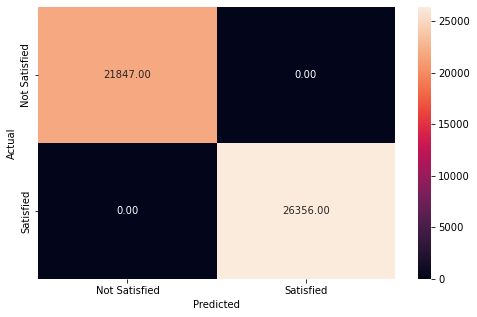

In [47]:
#Decision Tree Classifier after Scaling

dt = DecisionTreeClassifier(random_state=1);
dt.fit(x_train_scaled, y_train)
y_train_scaled_pred_dt = dt.predict(x_train_scaled)
metrics_score(y_train, y_train_scaled_pred_dt)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9363
           1       0.94      0.94      0.94     11296

    accuracy                           0.93     20659
   macro avg       0.93      0.93      0.93     20659
weighted avg       0.93      0.93      0.93     20659



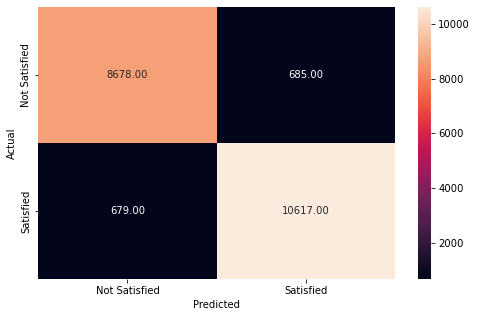

In [48]:
y_test_scaled_pred_dt = dt.predict(x_test_scaled)
metrics_score(y_test, y_test_scaled_pred_dt)

**Observation:**

- Decicsion Tree classifier is giving a very good performance with a perfect score on the training data and for test data we get an **accuracy** of 0.93, **recall** of 0.94 and **f1-score** of 0.94.
- Slightly better model score on training data over test data show model is overfitting 
- A recall of ~0.94 on the test data suggests that there is a small 6% chance that the model will predict that a passenger is satisfied when this is not true.


In [49]:
# K-fold cross-validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, x_test_scaled, y_test, cv=5)
print(f"The average score of the model with K-5 Cross validation is {np.average(scores)} ")

The average score of the model with K-5 Cross validation is 0.9158720818649069 


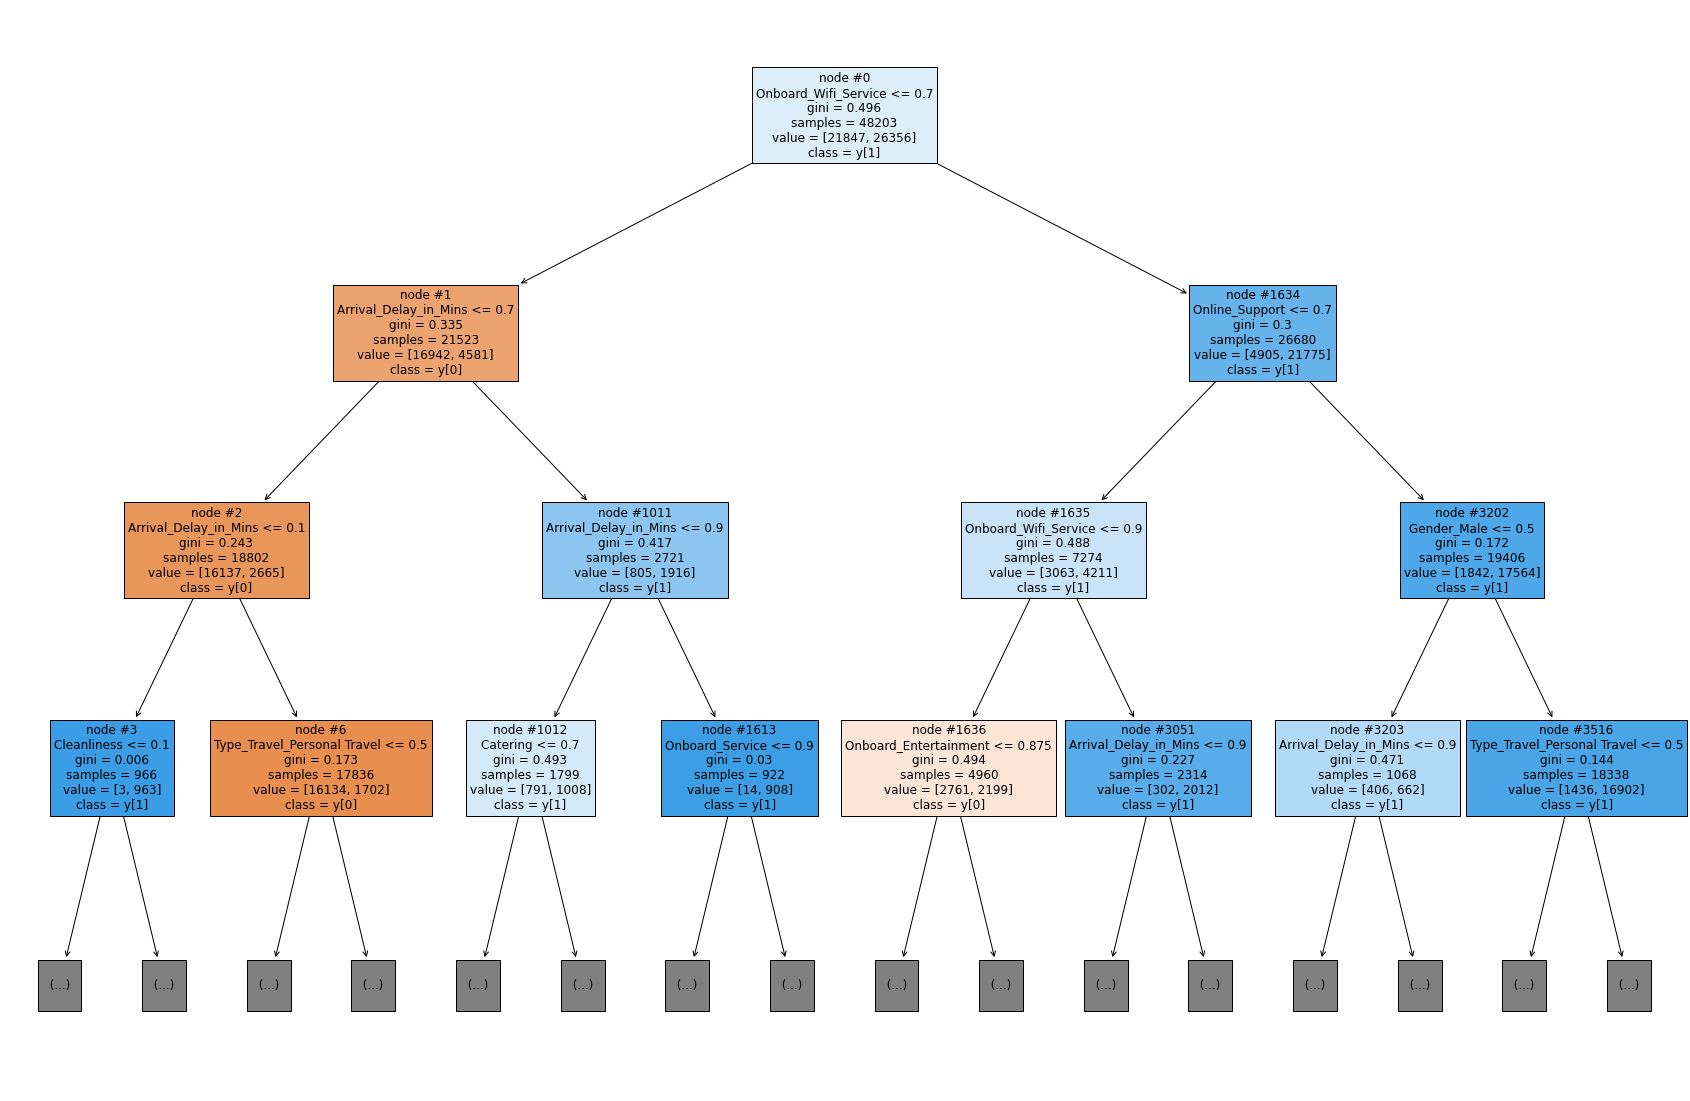

In [50]:
# Tree Plot Visualization of the Decision Tree

features = list(X.columns);
plt.figure(figsize=(30,20))
tree.plot_tree(dt, max_depth=3, feature_names=features, filled=True, fontsize=12, node_ids=True, class_names=True);
plt.show()

**Observations:**

- We can see that the first split is based on the 'Onboard_Entertainment'. It is one of the most important factors while predicting who will be satisfied or not. The better the Onboard_Entertainment the more likely the passenger is satisfied
- From the leafs in the second level, we can deduce that after the Onboard_Entertainment, the next most important features are Seat_Confort and Ease_of_Online_Booking. 

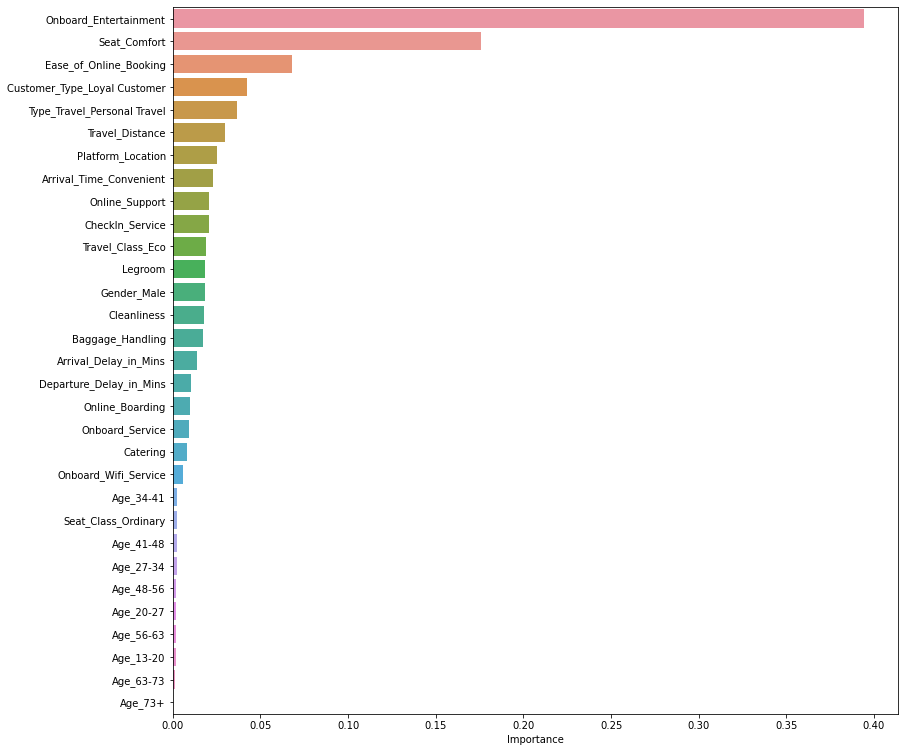

                              Importance
Onboard_Entertainment           0.394096
Seat_Comfort                    0.175954
Ease_of_Online_Booking          0.067882
Customer_Type_Loyal Customer    0.042325
Type_Travel_Personal Travel     0.036452
Travel_Distance                 0.029629
Platform_Location               0.025387
Arrival_Time_Convenient         0.022779
Online_Support                  0.020774
CheckIn_Service                 0.020379
Travel_Class_Eco                0.019001
Legroom                         0.018127
Gender_Male                     0.018093
Cleanliness                     0.017526
Baggage_Handling                0.016956
Arrival_Delay_in_Mins           0.013549
Departure_Delay_in_Mins         0.010172
Online_Boarding                 0.009614
Onboard_Service                 0.009427
Catering                        0.007904
Onboard_Wifi_Service            0.005623
Age_34-41                       0.002626
Seat_Class_Ordinary             0.002269
Age_41-48       

In [53]:
# Plotting the feature importance
importances = dt.feature_importances_
columns = x_train.columns;
importance_train = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False);
plt.figure(figsize=(13,13));
sns.barplot(importance_train.Importance, importance_train.index)
plt.show()

print(importance_train)

**Observation:**

- Similar to the Tree plot, our feature Importance diagram shows 'Onboard_Entertainment' is the most important feature followed by Seat_Confort and Ease_of_Online_Booking. 

**Decision Tree - Hyperparameter Tuning**

In [54]:
# Using GridSearch for Hyperparameter Tuning
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train_scaled, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     21847
           1       0.90      0.92      0.91     26356

    accuracy                           0.90     48203
   macro avg       0.90      0.90      0.90     48203
weighted avg       0.90      0.90      0.90     48203



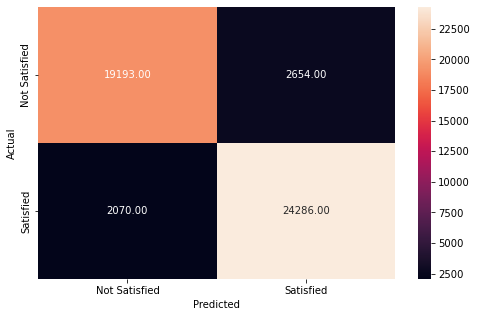

In [55]:
# Checking performance on the training dataset
y_train_scaled_pred_dt = dtree_estimator.predict(x_train_scaled)

metrics_score(y_train, y_train_scaled_pred_dt)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      9363
           1       0.90      0.92      0.91     11296

    accuracy                           0.90     20659
   macro avg       0.90      0.90      0.90     20659
weighted avg       0.90      0.90      0.90     20659



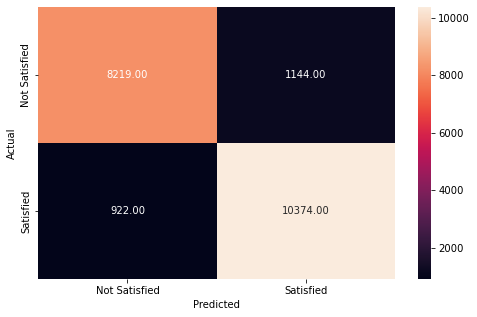

In [56]:
# Checking performance on the test dataset
y_test_scaled_pred_dt = dtree_estimator.predict(x_test_scaled)

metrics_score(y_test, y_test_scaled_pred_dt)

In [57]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test_scaled,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.899906,0.898098,0.899995


**Observation:**

- Tuning our Decision Tree model has reduced the performance of our model but the problem of overfitting has been eliminated compared to our previous model.

**Random Forest Classifier**

In [58]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21847
           1       1.00      1.00      1.00     26356

    accuracy                           1.00     48203
   macro avg       1.00      1.00      1.00     48203
weighted avg       1.00      1.00      1.00     48203



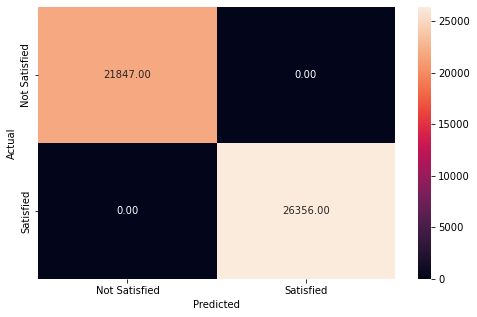

In [59]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_estimator, x_test, y_test, cv=5)
print(f"The average score of the model with K-5 Cross validation is {np.average(scores)} ")

The average score of the model with K-5 Cross validation is 0.9427852074942535 


In [61]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.949879,0.951181,0.95082


**Observation:**

- Random Forest classifier is giving a very good performance with a perfect score on the training data and for test data we get an **accuracy** of 0.95, **recall** of 0.95 and **f1-score** of 0.95.
- Slightly better model score on training data over test data show model is overfitting 
- A recall of ~0.95 on the test data suggests that there is a small 5% chance that the model will predict that a passenger is satisfied when this is not true.
- Our Random Forest Classifier is giving a slightly better performance than our previous Decision Tree model.

**Random Forest Classifier - Hyperparameter Tuning**

In [62]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

rf_estimator_tuned.fit(x_train, y_train)

rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21847
           1       1.00      1.00      1.00     26356

    accuracy                           1.00     48203
   macro avg       1.00      1.00      1.00     48203
weighted avg       1.00      1.00      1.00     48203



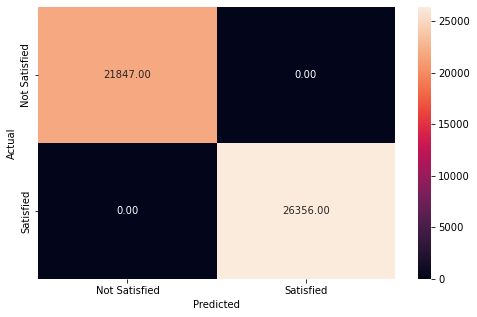

In [63]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

In [64]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.950676,0.951781,0.951547


**Observation:**

- After hyperparameter tuning, Random Forest cassilfier giving similar performance. 

**Adaboost Classifier**

In [65]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     21847
           1       0.91      0.91      0.91     26356

    accuracy                           0.90     48203
   macro avg       0.90      0.90      0.90     48203
weighted avg       0.90      0.90      0.90     48203



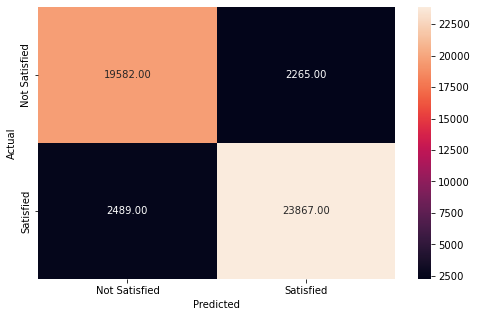

In [66]:
# Checking performance on the training data
y_pred_train_ad = adaboost_model.predict(x_train)

metrics_score(y_train, y_pred_train_ad)

**Observation:**

- Adaboost classifier is giving a model score on the training data and for test data we get an **accuracy** of 0.90, **recall** of 0.91 and **f1-score** of 0.90.
- Similar model score on training data and test data show model is not overfitting 
- A recall of ~0.90 on the test data suggests that there is a small 10% chance that the model will predict that a passenger is satisfied when this is not true.
- Adaboost model not performing as well as out previous model

In [67]:
# Using GridSearch for Hyperparameter Tuning
# Choose the type of classifier
adaboost_tuned = AdaBoostClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 250, 500],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(adaboost_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
adaboost_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
adaboost_tuned.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=250, random_state=1)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     21847
           1       0.92      0.91      0.91     26356

    accuracy                           0.90     48203
   macro avg       0.90      0.90      0.90     48203
weighted avg       0.90      0.90      0.90     48203



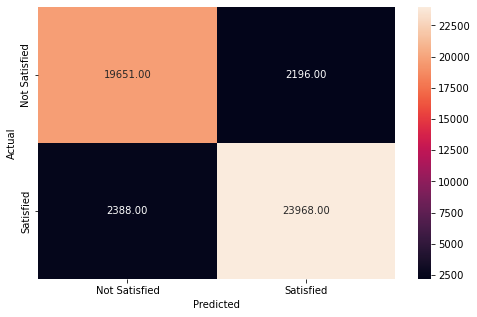

In [68]:
# Checking performance on the training data
y_pred_train_ad_tuned = adaboost_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_ad_tuned)

In [69]:
# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_tuned,x_test,y_test)


adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.899311,0.900376,0.900528


**Observation:**

- Adaboost model performance did not improve much after hyperparameter tuning.

In [70]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(x_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, x_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.921919,0.921795,0.922552


In [71]:
# Using GridSearch for Hyperparameter Tuning
# Choose the type of classifier
gbc_tuned = GradientBoostingClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 250, 500],
              'max_depth': np.arange(2, 7),              
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(gbc_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
gbc_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     21847
           1       0.99      0.98      0.98     26356

    accuracy                           0.98     48203
   macro avg       0.98      0.98      0.98     48203
weighted avg       0.98      0.98      0.98     48203



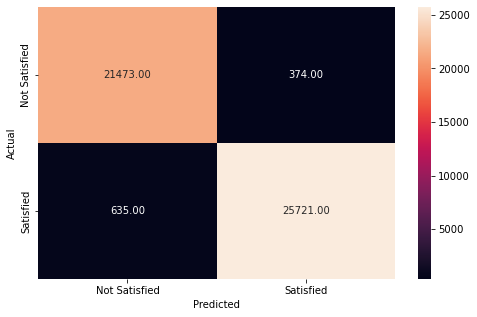

In [72]:
# Checking performance on the training data
y_pred_train_gbc_tuned = gbc_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_gbc_tuned)

In [73]:
# Model Performance on the test data
gbc_model_perf_test = model_performance_classification(gbc_tuned,x_test,y_test)


gbc_model_perf_test

,Precision,Recall,Accuracy
0,0.95454,0.955896,0.955467


**Observation:**

- Performance of Gradient boost classifier improve significantly after tuning.
- gbc model giving a very good performance and model score on the training data and test data with an **accuracy** of 0.96, **recall** of 0.95 and **f1-score** of 0.96.
- Slightly better model score on training data over test data show model is slightly overfitting 
- A recall of ~0.95 on the test data suggests that there is a small 5% chance that the model will predict that a passenger is satisfied when this is not true.

**Extreme Gradiant Boosting Classifier**

In [74]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,x_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.95389,0.955149,0.95479


In [75]:
# Using GridSearch for Hyperparameter Tuning
# Choose the type of classifier
xgb_tuned = XGBClassifier(random_state = 1)

# Grid of parameters to choose from
parameters = {'learning_rate': [0.1],
                'max_depth': [5, 7],
                #'min_child_weight': [1, 3, 5],
                #'subsample': [0.5, 0.7],
                #'colsample_bytree': [0.5, 0.7],
                'n_estimators' : [250, 500],
                "eval_metric": ["logloss"],              
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(xgb_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
xgb_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21847
           1       1.00      0.99      0.99     26356

    accuracy                           0.99     48203
   macro avg       0.99      0.99      0.99     48203
weighted avg       0.99      0.99      0.99     48203



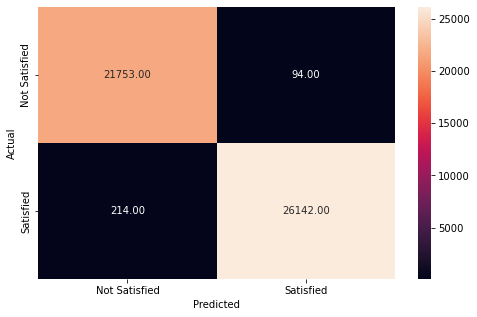

In [76]:
y_pred_train_xgb_tuned = xgb_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_xgb_tuned)

In [77]:
# Model Performance on the test data
xgb_model_perf_test = model_performance_classification(xgb_tuned,x_test,y_test)


xgb_model_perf_test

,Precision,Recall,Accuracy
0,0.955407,0.956649,0.95629


**Observation:**

- Performance of XGboost classifier improved slightly after tuning.
- xgboost model giving a very good performance and model score on the training data and test data with an **accuracy** of 0.96, **recall** of 0.95 and **f1-score** of 0.96.
- Slightly better model score on training data over test data show model is slightly overfitting 
- A recall of ~0.95 on the test data suggests that there is a small 5% chance that the model will predict that a passenger is satisfied when this is not true.

**Comparison of all the models we have built so far**

In [78]:
models_test_comp_df = pd.concat(
    
    [    
    dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_tuned_test.T , adaboost_model_perf_test.T, gbc_model_perf_test.T,
    xgb_model_perf_test.T
    ],
    
    axis = 1,
)

models_test_comp_df.columns = [
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "Tuned Adaboost classifier",
    "Tuned Gradientboost classifier",
    "Tuned XGBoost classifier"
]

models_test_comp_df

,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier,Tuned Adaboost classifier,Tuned Gradientboost classifier,Tuned XGBoost classifier
Precision,0.899906,0.949879,0.950676,0.899311,0.954540,0.955407
Recall,0.898098,0.951181,0.951781,0.900376,0.955896,0.956649
Accuracy,0.899995,0.950820,0.951547,0.900528,0.955467,0.956290


**Ensemble our 3 best models**

In [79]:
# import voting classifier
from sklearn.ensemble import VotingClassifier

# create a voting classifier with hard voting
voting_classifier_hard = VotingClassifier(
    estimators = [('rf_estimator_tuned' , RandomForestClassifier(random_state = 1,n_estimators=500)),
                  ('gbc_tuned' , GradientBoostingClassifier(random_state = 1, n_estimators= 500)),
                  ('xgb_tuned' , XGBClassifier(random_state = 1, n_estimators= 500))], 
    voting='hard')

# create a voting classifier with soft voting
voting_classifier_soft = VotingClassifier(
    estimators = [('rf_estimator_tuned' , RandomForestClassifier(random_state = 1,n_estimators=500)),
                  ('gbc_tuned' , GradientBoostingClassifier(random_state = 1, n_estimators= 500)),
                  ('xgb_tuned' , XGBClassifier(random_state = 1, n_estimators= 500))], 
    voting='soft')

# make predictions with the  voting model
voting_classifier_hard.fit(x_train, y_train)

voting_classifier_soft.fit(x_train, y_train)


VotingClassifier(estimators=[('rf_estimator_tuned',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=1)),
                             ('gbc_tuned',
                              GradientBoostingClassifier(n_estimators=500,
                                                         random_state=1)),
                             ('xgb_tuned',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            ena...
                                            gpu_id=None, grow_policy=None,
                                   

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21847
           1       1.00      1.00      1.00     26356

    accuracy                           1.00     48203
   macro avg       1.00      1.00      1.00     48203
weighted avg       1.00      1.00      1.00     48203



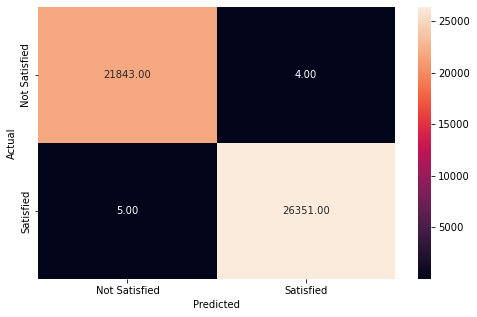

In [80]:
y_pred_train_voting_clf = voting_classifier_hard.predict(x_train)
metrics_score(y_train, y_pred_train_voting_clf)

In [81]:
# Model Performance on the test data
voting_clf_model_perf_test = model_performance_classification(voting_classifier_hard,x_test,y_test)

voting_clf_model_perf_test

,Precision,Recall,Accuracy
0,0.952639,0.953997,0.95358


In [82]:
# Model Performance on the test data
voting_clf_model_perf_test2 = model_performance_classification(voting_classifier_soft,x_test,y_test)

voting_clf_model_perf_test2

,Precision,Recall,Accuracy
0,0.954197,0.955559,0.955129


**Predicting target variable for test data with our best performing model Tuned Random Forest**

In [83]:
#Printing target variable for test data as array 

test_predictions = xgb_tuned.predict(x_test)
test_predictions

array([0, 0, 1, ..., 1, 1, 1])

In [84]:
# Making a new dataframe to get the display prediction results

test_result = pd.DataFrame()

test_result['ID'] = x_test0['ID']

test_result['Overall_Satisfaction'] = test_predictions

test_result

,ID,Overall_Satisfaction
51437,98851438,0
69621,98869622,0
47565,98847566,1
39390,98839391,1
24002,98824003,0
...,...,...
75286,98875287,0
63427,98863428,1
80319,98880320,1
60925,98860926,1


## Conclusion :

- The **xgboost model** after hyperparameter tuning gave the best performance with a recall and accuracy of 95.6% and the **voting_classifier** model gave the second best performance of 95.56%
- A recall of ~0.96 on the test data suggests that there is a small ~4% chance that the model will predict that a passenger is not satisfied when this is not true. This is still a very good performance.

### Recommendations
- From the features importance of our model, we can see that **'Onboard_Entertainment'**, **'Seat_Comfort'**, **'Ease_of_Online_Booking'** are the most important features that determines the 'Customer Satisfaction'. The travel company should focus on improving these services.